# **Predição de Fraudes Financeiras**

## **Justificativa:**
A crescente digitalização dos serviços financeiros trouxe inúmeros benefícios, mas também aumentou significativamente o risco de fraudes em transações eletrônicas. O impacto dessas fraudes é expressivo, tanto para instituições financeiras quanto para clientes, gerando prejuízos financeiros e afetando a confiança no sistema. Diante desse cenário, torna-se fundamental o desenvolvimento de soluções inteligentes que possam identificar e mitigar tentativas de fraude de forma eficiente e automatizada.

## **Introdução:**

Este projeto aborda o desafio de detectar fraudes em transações de cartão de crédito utilizando técnicas de ciência de dados e aprendizado de máquina. A base de dados utilizada contém registros reais de transações, altamente desbalanceada, refletindo a baixa incidência de fraudes em relação ao total de operações. O trabalho envolve etapas de análise exploratória, engenharia de features, modelagem e avaliação de diferentes algoritmos, buscando construir um modelo robusto e confiável para aplicação prática.

## **Objetivo:**

Desenvolver um modelo preditivo capaz de identificar transações fraudulentas com alta precisão e recall, minimizando falsos positivos e negativos. O objetivo é propor uma solução que possa ser integrada a sistemas de monitoramento financeiro, contribuindo para a segurança das operações e redução de perdas causadas por fraudes.

## Importação de Bibliotecas

In [ ]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para pré-processamento e divisão de dados
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split

# Bibliotecas para os modelos de machine learning
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline

# Bibliotecas para métricas de avaliação
from sklearn.metrics import (
    confusion_matrix,classification_report, precision_score,
    roc_auc_score, roc_curve)

## 1. Data Collection

Nesta etapa, realizamos a importação da base de dados que será utilizada durante o projeto, carregando o arquivo CSV.

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Base_M43_Pratique_CREDIT_CARD_FRAUD.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### **Sobre a base**
O conjunto de dados refere-se a transações realizadas ao longo de dois dias do mês de setembro de 2023, com o objetivo de identificar padrões relacionados a fraudes financeiras.

A base original continha diversas variáveis sensíveis que foram transformadas utilizando o método de Análise de Componentes Principais (PCA), preservando a confidencialidade das informações. Após essa transformação, restaram 28 componentes principais, que compõem a maior parte dos dados.

Além desses componentes, três variáveis foram mantidas em sua forma original:

Time: representa o tempo, em segundos, decorrido desde a primeira transação registrada;

Amount: valor monetário da transação;

Class: variável alvo, onde 0 indica uma transação legítima e 1 indica uma transação fraudulenta.

## 2. Data Preprocessing

Nesta etapa, verificamos os dados ausentes, balanceamento das classes, estatísticas, normalizamos e padronizamos as variáveis 'Time' e 'Amount'.

Verificando se há valores nulos no dataset.

In [4]:
nulos = df.isnull().sum()

if (nulos > 0).any():
    print("Colunas com valores nulos:")
    print(nulos[nulos > 0])
else:
    print("Nenhuma coluna contém valores nulos.")

Nenhuma coluna contém valores nulos.


Verificando o balanceamento das classes.

In [5]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Analisando estatísticas das variáveis originais.

In [6]:
variaveis_orig = ['Amount', 'Time']

df[variaveis_orig].describe()

,Amount,Time
count,284807.000000,284807.000000
mean,88.349619,94813.859575
std,250.120109,47488.145955
min,0.000000,0.000000
25%,5.600000,54201.500000
50%,22.000000,84692.000000
75%,77.165000,139320.500000
max,25691.160000,172792.000000


A variável Amount possui uma média de aproximadamente $88, mas apresenta valores que chegam até $25.691, evidenciando uma alta variabilidade.  
Essa dispersão pode impactar negativamente o desempenho de modelos sensíveis à escala dos dados, como SVM. Por isso, é fundamental aplicar técnicas adequadas de padronização ou normalização a essa variável antes do treinamento dos modelos.

A variável Time, por sua vez, confirma que o conjunto de dados abrange um período de dois dias consecutivos.  
A partir dela, é possível extrair novas features temporais, como hora do dia, o que pode auxiliar na identificação de padrões temporais de fraude, por exemplo, se há maior incidência em determinados horários.

Padronizando os dados de 'Amount' e 'Time'.

In [7]:
scaler = StandardScaler()
df[['Amount_scaled', 'Time_scaled']] = scaler.fit_transform(df[['Amount', 'Time']])

## 3. Exploratory Data Analysis (EDA)

Analisamos as distribuições das variáveis, criamos de novas features e visualizamos as correlações entre atributos, buscando identificar insights úteis para a modelagem.

Criando nova feature 'hora_do_dia', para identificar padrões temporais de fraude.

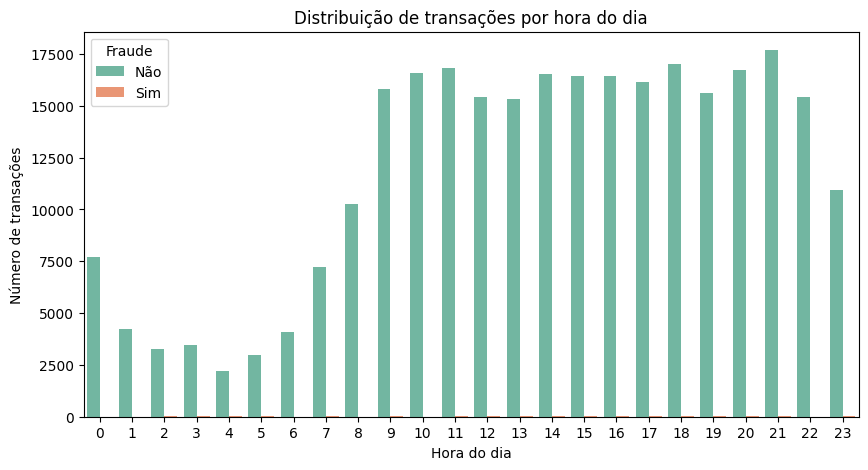

In [8]:
df['hora_do_dia'] = ((df['Time'] % 86400) // 3600).astype(int)

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='hora_do_dia', hue='Class', palette='Set2')
plt.title('Distribuição de transações por hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Número de transações')
plt.legend(title='Fraude', labels=['Não', 'Sim'])
plt.xticks(range(24))
plt.show()

Como estamos lidando com uma base extretamente desbalanceada, é difícil de visualizar as fraudes em meio ao amontoado de transações.  
Vamos focar apenas nas transações fraudulentas, para identificar possíveis padrões escondidos. Além disso, vamos trazer a proporção do risco por hora.

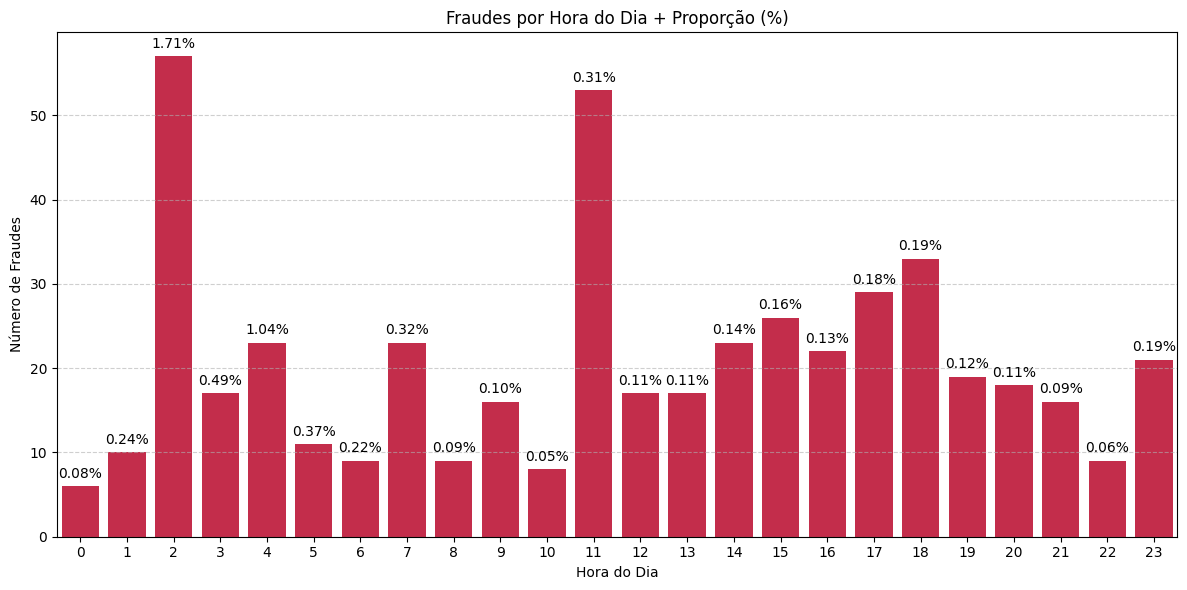

In [9]:
transacoes_por_hora = df.groupby('hora_do_dia').size()
fraudes_por_hora = df[df['Class'] == 1].groupby('hora_do_dia').size()
fraude_percentual = (fraudes_por_hora / transacoes_por_hora * 100).fillna(0)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x=fraudes_por_hora.index, y=fraudes_por_hora.values, color='crimson')

for index, value in enumerate(fraudes_por_hora.values):
    pct = fraude_percentual.iloc[index]
    plt.text(index, value + 1, f'{pct:.2f}%', ha='center', fontsize=10)

plt.title('Fraudes por Hora do Dia + Proporção (%)')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Fraudes')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

As fraudes ocorrem com maior frequência durante a madrugada e o início da manhã, com destaque para um pico absoluto às 2h da manhã, quando a proporção de fraudes atinge 1,71%. Apesar do baixo volume de transações nesse horário, o risco relativo é significativamente elevado.  
Esse padrão se repete, embora com menor intensidade, em outros horários da madrugada e início da manhã: 1h (0,24%), 3h (0,49%), 4h (1,04%), 5h (0,31%) e 6h (0,22%).

Por outro lado, nos períodos de maior atividade, especialmente entre 8h e 21h, que concentram o maior volume de transações, a proporção de fraudes é consideravelmente menor, variando entre 0,06% e 0,12%.  
A única exceção é o horário das 11h, que apresenta uma taxa de fraude atípica de 0,31%, com mais de 50 ocorrências registradas.

Esses dados sugerem que, embora a maior parte das transações ocorra durante o horário comercial, os fraudadores tendem a agir em janelas de menor movimentação, possivelmente buscando evitar a vigilância e os mecanismos de detecção que costumam ser mais ativos em horários de pico.

Considerando esse padrão, criaremos a variável booleana horario_de_risco, que assume o valor 1 para transações realizadas em horários cuja taxa de fraude excede esse limiar (0,20%) e 0 caso contrário.  

Essa feature tem como objetivo fornecer ao modelo um indicativo direto de períodos com maior vulnerabilidade, auxiliando na identificação de padrões temporais associados a atividades fraudulentas.

In [10]:
hora_risco = [1, 2, 3, 4, 5, 6, 7, 11]

df['horario_de_risco'] = df['hora_do_dia'].apply(lambda x: 1 if x in hora_risco else 0)

df['horario_de_risco_scaled'] = scaler.fit_transform(df[['horario_de_risco']])

Verificando agora a distribuição dos valores da variável Amount.

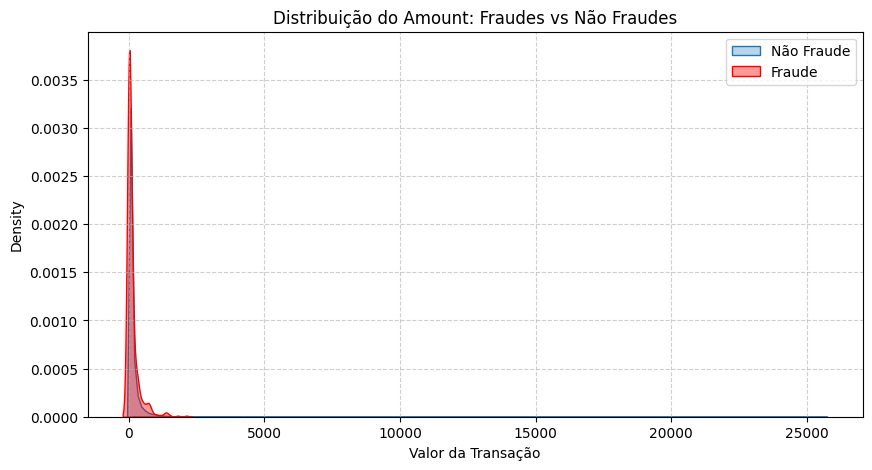

In [11]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df[df['Class'] == 0], x='Amount', label='Não Fraude', fill=True, alpha=0.3)
sns.kdeplot(data=df[df['Class'] == 1], x='Amount', label='Fraude', fill=True, alpha=0.4, color='red')
plt.title('Distribuição do Amount: Fraudes vs Não Fraudes')
plt.xlabel('Valor da Transação')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Como os valores fraudulentos estão majoritariamente concentrados em faixas mais baixas, vamos ajustar o intervalo do eixo x para destacar esses padrões com muito mais nitidez.

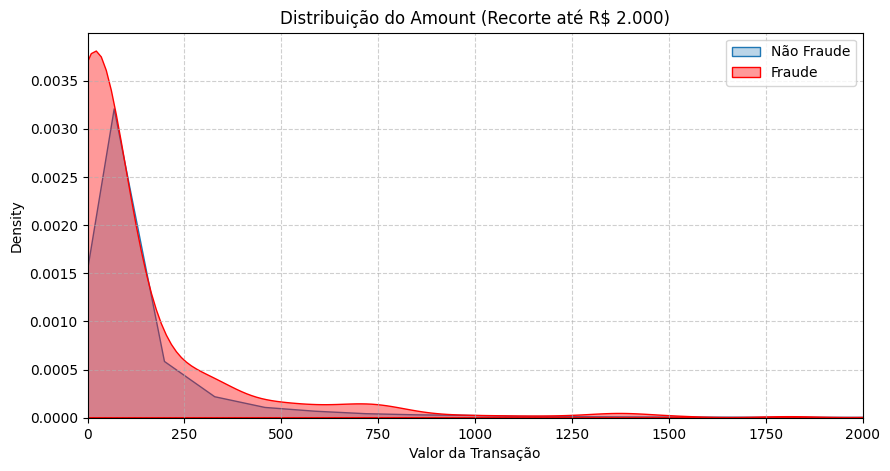

In [12]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df[df['Class'] == 0], x='Amount', label='Não Fraude', fill=True, alpha=0.3)
sns.kdeplot(data=df[df['Class'] == 1], x='Amount', label='Fraude', fill=True, alpha=0.4, color='red')
plt.title('Distribuição do Amount (Recorte até R$ 2.000)')
plt.xlabel('Valor da Transação')
plt.legend()
plt.xlim(0, 2000)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

O gráfico revela que transações fraudulentas estão fortemente concentradas em valores baixos, especialmente abaixo de R$ 200.  
A densidade das fraudes diminui de forma acentuada conforme o valor da transação aumenta, sugerindo que fraudadores tendem a agir em valores menores, possivelmente para evitar detecção por sistemas automatizados ou chamar menos atenção de revisões humanas.

Já as transações legítimas apresentam uma distribuição mais ampla, com densidade significativa tanto em valores baixos quanto moderados. Essa diferença sugere que o valor da transação pode ser uma feature relevante na modelagem preditiva.

Verificando a matriz de correlação, para identificar as variáveis mais relevantes.

In [13]:
df.corr()['Class'].sort_values(ascending=False)

Class                      1.000000
V11                        0.154876
V4                         0.133447
V2                         0.091289
V21                        0.040413
V19                        0.034783
horario_de_risco           0.029412
horario_de_risco_scaled    0.029412
V20                        0.020090
V8                         0.019875
V27                        0.017580
V28                        0.009536
Amount                     0.005632
Amount_scaled              0.005632
V26                        0.004455
V25                        0.003308
V22                        0.000805
V23                       -0.002685
V15                       -0.004223
V13                       -0.004570
V24                       -0.007221
Time                      -0.012323
Time_scaled               -0.012323
hora_do_dia               -0.017109
V6                        -0.043643
V5                        -0.094974
V9                        -0.097733
V1                        -0

In [14]:
selecao_variaveis = ['Class', 'V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V18', 'V1', 'V11', 'V4', 'V5', 'V2', 'horario_de_risco_scaled']
df_reduzido = df[selecao_variaveis]
df_reduzido

,Class,V17,V14,V12,V10,V16,V3,V7,V18,V1,V11,V4,V5,V2,horario_de_risco_scaled
0,0,0.207971,-0.311169,-0.617801,0.090794,-0.470401,2.536347,0.239599,0.025791,-1.359807,-0.551600,1.378155,-0.338321,-0.072781,-0.429976
1,0,-0.114805,-0.143772,1.065235,-0.166974,0.463917,0.166480,-0.078803,-0.183361,1.191857,1.612727,0.448154,0.060018,0.266151,-0.429976
2,0,1.109969,-0.165946,0.066084,0.207643,-2.890083,1.773209,0.791461,-0.121359,-1.358354,0.624501,0.379780,-0.503198,-1.340163,-0.429976
3,0,-0.684093,-0.287924,0.178228,-0.054952,-1.059647,1.792993,0.237609,1.965775,-0.966272,-0.226487,-0.863291,-0.010309,-0.185226,-0.429976
4,0,-0.237033,-1.119670,0.538196,0.753074,-0.451449,1.548718,0.592941,-0.038195,-1.158233,-0.822843,0.403034,-0.407193,0.877737,-0.429976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0,1.991691,4.626942,2.711941,4.356170,1.107641,-9.834783,-4.918215,0.510632,-11.881118,-1.593105,-2.066656,-5.364473,10.071785,-0.429976
284803,0,-0.025693,-0.675143,0.915802,-0.975926,-0.711757,2.035030,0.024330,-1.221179,-0.732789,-0.150189,-0.738589,0.868229,-0.055080,-0.429976
284804,0,0.313502,-0.510602,0.063119,-0.484782,0.140716,-3.249640,-0.296827,0.395652,1.919565,0.411614,-0.557828,2.630515,-0.301254,-0.429976
284805,0,0.509928,0.449624,-0.962886,-0.399126,-0.608577,0.702510,-0.686180,1.113981,-0.240440,-1.933849,0.689799,-0.377961,0.530483,-0.429976


A seleção das variáveis utilizadas no modelo foi orientada por uma análise exploratória detalhada, incluindo visualizações gráficas e o estudo da correlação com a variável-alvo Class.  

O objetivo foi identificar atributos com maior potencial preditivo para a detecção de transações fraudulentas. Foram priorizadas variáveis com correlação (positiva ou negativa) acima de um determinado limiar com a variável alvo, bem como variáveis que apresentaram padrões relevantes ao longo da análise.

A inclusão da variável horario_de_risco, criada a partir de padrões temporais identificados na análise, busca oferecer ao modelo uma perspectiva adicional sobre o contexto das transações com maior incidência de fraude.

Separando as variáveis independentes (X) e dependente (y).

In [15]:
X = df_reduzido.drop(columns='Class')
y = df_reduzido['Class']

## 4. Modeling & Evaluation

### Duelo de Modelos - LogisticRegression vs XGboost

Para a etapa de modelagem, optamos por comparar dois algoritmos com características distintas e amplamente utilizados em problemas de classificação supervisionada:  
**Regressão Logística e XGBoost**.

A **Regressão Logística** é um modelo linear simples e eficiente, bastante interpretável, que estima a probabilidade de ocorrência de um evento.  
Sua força está na facilidade de compreensão dos coeficientes e bom desempenho em problemas lineares ou quase lineares. No entanto, pode apresentar limitações em capturar relações complexas ou não lineares nos dados.

O **XGBoost**, por outro lado, é um modelo de gradient boosting que se destaca pelo desempenho em competições e problemas reais. Ele lida bem com valores ausentes, dados desbalanceados e relações não lineares.  
Sua maior vantagem é a robustez e alta capacidade de generalização, mesmo em cenários complexos. Em contrapartida, exige maior atenção no ajuste de hiperparâmetros e tende a ser mais propenso ao overfitting se não regulado corretamente.

Com esse duelo, buscamos identificar qual dos dois modelos oferece melhor desempenho preditivo no contexto do problema de fraude, equilibrando acurácia, interpretabilidade e robustez.

### LogisticRegression

Precision-Scores por fold: [0.05843293 0.05236769 0.05641026 0.05117884 0.05237515]
Média Precision-score: 0.0542
              precision    recall  f1-score   support

           0     0.9998    0.9726    0.9860    284315
           1     0.0540    0.9045    0.1019       492

    accuracy                         0.9725    284807
   macro avg     0.5269    0.9385    0.5440    284807
weighted avg     0.9982    0.9725    0.9845    284807



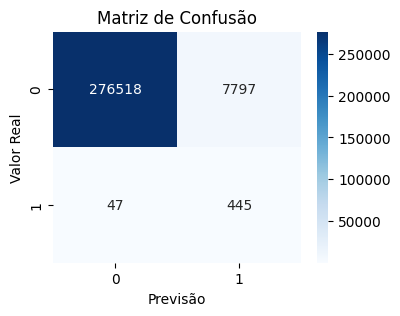

In [16]:
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('lr', LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipeline, X, y, cv=skf, scoring='precision')

y_pred = cross_val_predict(pipeline, X, y, cv=skf)

print(f'Precision-Scores por fold: {scores}')
print(f'Média Precision-score: {scores.mean():.4f}')
print(classification_report(y, y_pred, digits=4))

classes = ['0', '1']
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

O modelo de Regressão Logística demonstrou desempenho satisfatório no contexto de detecção de fraudes, especialmente no que diz respeito à sua capacidade de identificar casos positivos (fraudes reais). O recall da classe 1 atingiu 90,45%, o que indica que o modelo conseguiu encontrar a grande maioria das transações fraudulentas. Essa característica é essencial em cenários onde o custo de não identificar uma fraude é elevado.

No entanto, esse bom desempenho em sensibilidade veio acompanhado de um precision consideravelmente baixo para a classe fraudulenta (apenas 5,40%). Isso significa que a cada 100 transações classificadas como fraude, cerca de 95 eram, na verdade, transações legítimas — evidenciando uma taxa elevada de falsos positivos. Esse comportamento fica ainda mais claro na matriz de confusão: das quase 8 mil transações legítimas previstas como fraude, somente 445 eram realmente fraudulentas.

Apesar disso, o modelo acertou corretamente mais de 97% das transações legítimas, mantendo uma acurácia global de 97,25%, valor que deve ser interpretado com cautela devido ao desequilíbrio da base (a maioria esmagadora das transações são legítimas). O f1-score da classe 1 ficou em torno de 10,19%, refletindo esse desbalanceamento entre precisão e sensibilidade.

Em resumo, o modelo atual está configurado para priorizar a detecção de fraudes ao máximo, mesmo à custa de gerar interrupções em operações legítimas. 


### XGBoost (Extreme Gradient Boosting)

F1-Scores por fold: [0.648      0.71836735 0.61254613 0.64257028 0.65060241]
Média F1-score: 0.6544

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9987    0.9992    284315
           1     0.5350    0.8394    0.6535       492

    accuracy                         0.9985    284807
   macro avg     0.7673    0.9191    0.8264    284807
weighted avg     0.9989    0.9985    0.9986    284807



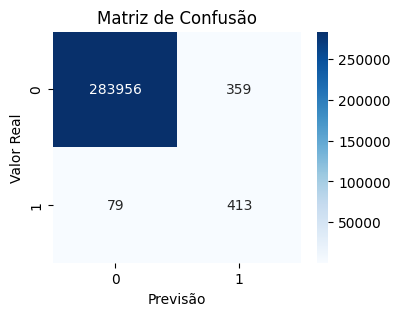

In [17]:
pipeline_xgb = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    ))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipeline_xgb, X, y, cv=skf, scoring='f1', n_jobs=-1)
print(f'F1-Scores por fold: {scores}')
print(f'Média F1-score: {scores.mean():.4f}')

y_pred = cross_val_predict(pipeline_xgb, X, y, cv=skf, n_jobs=-1)

print('\nClassification Report:')
print(classification_report(y, y_pred, digits=4))


classes = ['0', '1']
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

O modelo XGBoost demonstrou desempenho robusto e equilibrado na detecção de fraudes, alcançando um f1-score médio de 65,44% ao longo das cinco dobras da validação cruzada. Esse valor reflete uma boa harmonia entre precisão e recall para a classe minoritária, especialmente considerando o extremo desbalanceamento da base.

A capacidade do modelo de identificar transações fraudulentas (recall da classe 1) foi de 83,94%, indicando que ele consegue capturar a grande maioria dos casos positivos.  
Esse é um excelente resultado em contextos onde o principal objetivo é não deixar passar fraudes reais.

Em contrapartida, a precisão da classe 1 foi de 53,50%, ou seja, a cada 100 transações classificadas como fraudulentas, cerca de 46 eram na verdade legítimas. Apesar disso, o número de falsos positivos caiu drasticamente em relação ao modelo de regressão logística, saindo de quase 8 mil para apenas 359 transações legítimas sinalizadas incorretamente como fraude.

A matriz de confusão reforça esse equilíbrio:

- O modelo acertou corretamente 283.956 transações legítimas.
- Classificou erroneamente 359 transações legítimas como fraude.
- Detectou corretamente 413 das 492 fraudes reais.
- Deixou passar 79 fraudes, o que representa uma taxa de erro baixa para a classe positiva.

A acurácia geral foi de 99,85%, valor alto, mas que deve ser interpretado com cautela dado o desequilíbrio das classes.  
Ainda assim, as métricas de macro média e média ponderada (weighted avg) apontam para um modelo mais justo e eficaz que sua versão anterior baseada em regressão.

Vamos buscar o melhor conjunto de hiperparâmetros para melhorar os resultados do XGBoost

In [18]:
pipeline_xgb_hiper = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    ))
])

param_grid_xgb = {
    'xgb__n_estimators': [50, 100, 200, 300],
    'xgb__max_depth': [3, 5, 7, 9],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__gamma': [0, 0.1, 0.2, 0.4],
    'xgb__reg_lambda': [0.5, 1, 5],
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=pipeline_xgb_hiper,
    param_distributions=param_grid_xgb,
    n_iter=30,
    scoring='f1',
    cv=skf,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X, y)

print('Melhores hiperparâmetros:', random_search.best_params_)
print('Melhor F1-score:', random_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Ana Paula\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:41:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Melhores hiperparâmetros: {'xgb__subsample': 0.8, 'xgb__reg_lambda': 1, 'xgb__n_estimators': 300, 'xgb__max_depth': 9, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 1.0}
Melhor F1-score: 0.7532599145945419



Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9993    0.9995    284315
           1     0.6826    0.8394    0.7530       492

    accuracy                         0.9990    284807
   macro avg     0.8412    0.9194    0.8762    284807
weighted avg     0.9992    0.9990    0.9991    284807



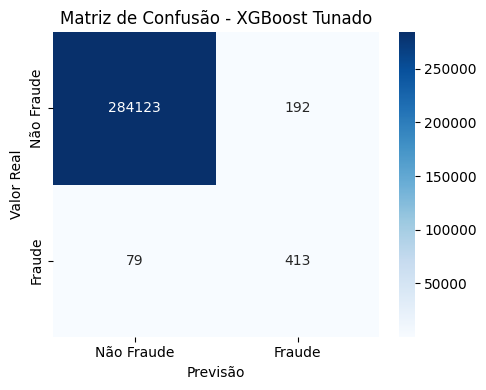

In [19]:
y_pred_hiper = cross_val_predict(random_search.best_estimator_, X, y, cv=skf, n_jobs=-1)

print('\nClassification Report:')
print(classification_report(y, y_pred_hiper, digits=4))

cm = confusion_matrix(y, y_pred_hiper)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - XGBoost Tunado')
plt.tight_layout()
plt.show()

O modelo XGBoost com hiperparâmetros otimizados apresentou melhora geral no desempenho, com F1-score da classe 1 subindo para 75,30%, mantendo o recall em 83,9%, e aumentando a precisão para 68,26% — um avanço significativo em relação ao modelo inicial (53,5% de precisão).

Na matriz de confusão:

Detectou corretamente 413 fraudes (mesmo recall da versão anterior),

Reduziu os falsos positivos para 192, contra 359 anteriormente — isso significa menos interrupções desnecessárias em transações legítimas,

A acurácia global subiu levemente para 99,90%, refletindo o ganho na classe majoritária.

Mesmo com o ajuste priorizando também a classe 0, o modelo se manteve eficiente na detecção de fraudes e ganhou em confiabilidade operacional, apresentando menos alarmes falsos sem comprometer a sensibilidade.

Fitting 5 folds for each of 25 candidates, totalling 125 fits

Melhores hiperparâmetros (foco em Precisão):
 {'xgb__subsample': 1.0, 'xgb__scale_pos_weight': 200, 'xgb__reg_lambda': 1, 'xgb__n_estimators': 200, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 1.0}
Melhor Precisão na validação cruzada: 0.8520971337613459

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997    284315
           1     0.8515    0.8272    0.8392       492

    accuracy                         0.9995    284807
   macro avg     0.9256    0.9135    0.9195    284807
weighted avg     0.9994    0.9995    0.9994    284807



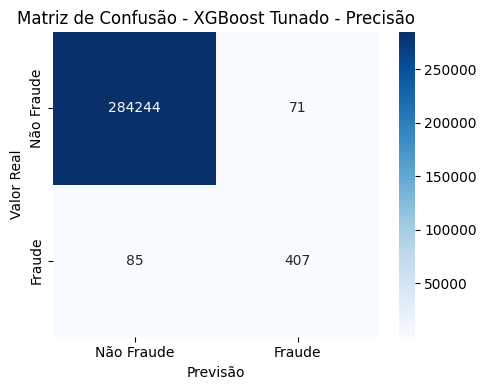

In [20]:
pipeline_xgb_precision = ImbPipeline(steps=[
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42
    ))
])

param_grid_precision = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0],
    'xgb__gamma': [0, 0.1],
    'xgb__reg_lambda': [1, 5],
    'xgb__scale_pos_weight': [200, 300, 400]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search_precision = RandomizedSearchCV(
    estimator=pipeline_xgb_precision,
    param_distributions=param_grid_precision,
    n_iter=25,
    scoring='precision',
    cv=skf,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_precision.fit(X, y)

print('\nMelhores hiperparâmetros (foco em Precisão):\n', random_search_precision.best_params_)
print('Melhor Precisão na validação cruzada:', random_search_precision.best_score_)

y_pred_precision = cross_val_predict(random_search_precision.best_estimator_, X, y, cv=skf, n_jobs=-1)

print('\nClassification Report:')
print(classification_report(y, y_pred_precision, digits=4))

cm = confusion_matrix(y, y_pred_precision)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - XGBoost Tunado - Precisão')
plt.tight_layout()
plt.show()

**Avaliação final do modelo XGBoost (foco em precisão)**


Após reorientar a otimização do XGBoost para maximizar a precisão, o modelo apresentou desempenho excepcional durante a validação cruzada. O principal destaque foi a precisão da classe 1 (fraudes), que atingiu 85,15%, representando uma grande redução na quantidade de falsos positivos — ou seja, o modelo passou a classificar como fraude apenas as transações com alta probabilidade de realmente o serem.

Mesmo com esse foco em precisão, o modelo manteve um nível elevado de sensibilidade (recall de 82,72%), conseguindo identificar a maior parte das fraudes reais. Isso indica um excelente equilíbrio entre detectar fraudes e evitar bloqueios indevidos de transações legítimas.

A matriz de confusão da validação cruzada mostra que, das 492 fraudes, 407 foram corretamente identificadas, e apenas 85 deixaram de ser detectadas. Em contrapartida, das 284.315 transações legítimas, apenas 71 foram classificadas erroneamente como fraude — uma taxa extremamente baixa. O modelo também apresentou uma acurácia global de 99,95% e um f1-score de 83,92% para a classe 1.

Esses resultados indicam que este é, até o momento, o modelo mais equilibrado, conciliando precisão e recall de forma eficiente.

Após a etapa de validação cruzada, optamos por testar o modelo no conjunto de **holdout** — uma amostra separada no início do processo e não utilizada durante o treinamento nem na validação.  
Essa escolha tem como objetivo avaliar a capacidade real de generalização do modelo, simulando como ele se comportaria em um cenário prático com dados completamente novos.

Testar no holdout é uma prática essencial para confirmar se o desempenho observado durante a validação cruzada se mantém fora do ambiente de treino e se o modelo está de fato pronto para ser aplicado em produção.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

best_model = random_search_precision.best_estimator_
best_model.fit(X_train, y_train)

y_pred_test = best_model.predict(X_test)
print('recisão no holdout:', precision_score(y_test, y_pred_test))

recisão no holdout: 0.7941176470588235



Classification Report - Holdout:
              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9997     56864
           1     0.7941    0.8265    0.8100        98

    accuracy                         0.9993     56962
   macro avg     0.8969    0.9131    0.9048     56962
weighted avg     0.9993    0.9993    0.9993     56962



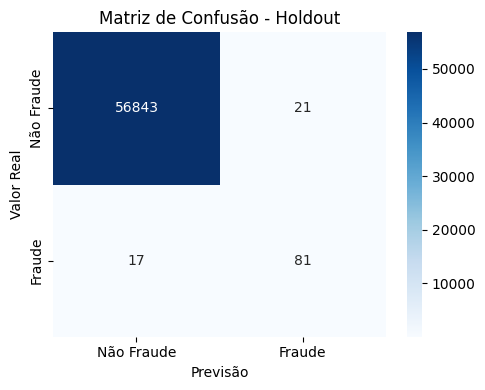

In [22]:
print('\nClassification Report - Holdout:')
print(classification_report(y_test, y_pred_test, digits=4))

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Fraude', 'Fraude'],
            yticklabels=['Não Fraude', 'Fraude'])
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Holdout')
plt.tight_layout()
plt.show()

**Avaliação do modelo no conjunto de teste (holdout)**

O desempenho se manteve robusto, confirmando a capacidade de generalização do modelo.

No conjunto de teste, o modelo alcançou uma precisão de 79,41% e um recall de 82,65% para a classe 1 (fraudes), resultando em um f1-score de 81,00%. Esses valores mostram que o modelo continua sendo eficaz em detectar fraudes com alto grau de acerto, ao mesmo tempo em que minimiza falsos positivos, característica essencial para não prejudicar a experiência de usuários legítimos.

A matriz de confusão reforça esse equilíbrio: das 98 fraudes presentes, 81 foram corretamente identificadas e apenas 17 deixaram de ser detectadas. Por outro lado, apenas 21 transações legítimas foram incorretamente classificadas como fraude, dentro de um universo de mais de 56 mil transações válidas.

Esses resultados demonstram que o modelo se manteve consistente fora do ambiente de validação e está pronto para ser aplicado em um cenário real de detecção de fraudes, conciliando segurança e confiabilidade.

## 5. Final Results

A seguir, apresentamos os gráficos que sintetizam o desempenho dos modelos avaliados:

- A curva ROC do modelo XGBoost demonstra sua excelente capacidade de discriminar entre transações fraudulentas e legítimas.
- A comparação das principais métricas (precision, recall e f1-score) evidencia o ganho de performance do XGBoost em relação à Regressão Logística.

AUC-ROC: 0.9810


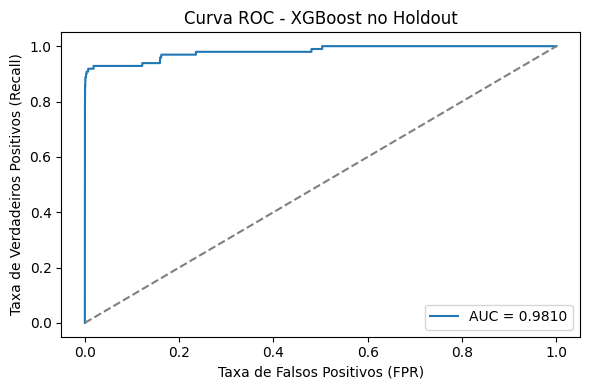

In [23]:
y_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

auc_score = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc_score:.4f}')

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC - XGBoost no Holdout')
plt.legend()
plt.tight_layout()
plt.show()

A curva ROC e o valor da AUC reforçam a performance do modelo, com uma AUC de 0.9810, evidenciando uma excelente capacidade de discriminar entre transações fraudulentas e legítimas, mesmo em um cenário altamente desbalanceado.

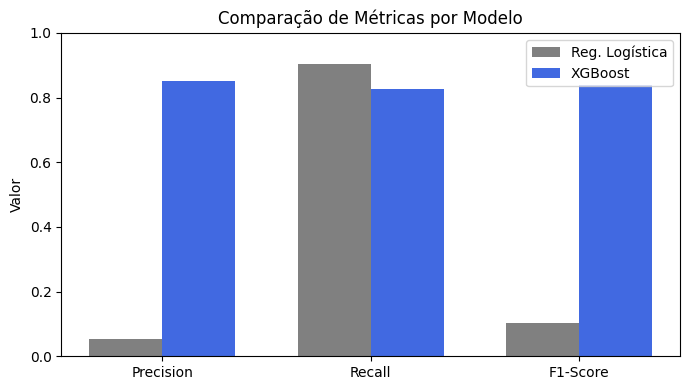

In [24]:
metrics = ['Precision', 'Recall', 'F1-Score']
logistic_scores = [0.0540, 0.9045, 0.1019]
xgb_scores = [0.8515, 0.8272, 0.8392]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(7, 4))
plt.bar(x - width/2, logistic_scores, width, label='Reg. Logística', color='gray')
plt.bar(x + width/2, xgb_scores, width, label='XGBoost', color='royalblue')

plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel('Valor')
plt.title('Comparação de Métricas por Modelo')
plt.legend()
plt.tight_layout()
plt.show()

O gráfico resume o desempenho dos dois modelos avaliados com base nas métricas mais relevantes para o problema de detecção de fraudes: **precisão**, **recall** e **f1-score** da classe 1 (fraude). 

Fica evidente que o modelo XGBoost apresentou um equilíbrio superior entre identificar corretamente as fraudes (recall) e minimizar os falsos positivos (precisão), resultando em um f1-score significativamente mais alto.  

Esse desempenho consistente justifica a sua escolha como modelo final do projeto.

#### **Conclusão final**

O projeto teve como objetivo principal desenvolver um modelo de classificação para detecção de fraudes em transações financeiras, a partir de uma base real e altamente desbalanceada, contendo apenas 0,17% de casos de fraude.

Durante a fase de análise exploratória, foram identificados padrões relevantes, como a maior incidência de fraudes durante a madrugada e o início da manhã. A partir disso, foi criada a variável derivada horario_de_risco, com o intuito de auxiliar o modelo a capturar esse comportamento atípico.

Foram testados dois algoritmos de classificação:

Regressão Logística, pela sua simplicidade e interpretabilidade;

XGBoost, por sua robustez e performance em bases desbalanceadas.

Apesar da Regressão Logística ter apresentado bom recall (90,45%), sua precisão foi extremamente baixa (5,40%), resultando em um elevado número de falsos positivos, o que compromete a aplicabilidade do modelo em um cenário real.

Por outro lado, o XGBoost, após processo de tuning com foco em precisão, apresentou resultados altamente satisfatórios:

Precisão da classe 1 (fraude): 85,15%

Recall da classe 1: 82,65%

F1-score: 81,00%

AUC-ROC: 0.9810, evidenciando excelente capacidade de separação entre classes

Acurácia global: 99,93%

Esses resultados foram confirmados no conjunto de teste (holdout), validando a generalização e estabilidade do modelo.  
A matriz de confusão demonstrou uma baixa taxa de falsos positivos (21 casos) e uma alta taxa de identificação correta de fraudes (81 de 98).

Dessa forma, o modelo XGBoost configurado para priorizar a precisão sem comprometer significativamente o recall se mostrou o mais adequado para o problema proposto.  
Ele representa uma solução prática e eficiente para aplicação em sistemas reais de detecção de fraude, equilibrando segurança com experiência do usuário.